**Population positivity rates by US states on a Monthly Basis**

In [ ]:
import pandas as pd

# Load the COVID dataset
covid_df = pd.read_csv('us-states.csv')

# Convert 'date' column to datetime and extract year and month
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df['year_month'] = covid_df['date'].dt.to_period('M')

# Ensure 'fips' is a string to keep leading zeros
covid_df['fips'] = covid_df['fips'].astype(str).str.zfill(5)

# Remove any rows with missing data
covid_df.dropna(subset=['state', 'fips', 'cases', 'deaths'], inplace=True)

# Convert 'cases' and 'deaths' to integers
covid_df['cases'] = covid_df['cases'].astype(int)
covid_df['deaths'] = covid_df['deaths'].astype(int)

# Group by state and year_month, then sum cases and deaths
monthly_covid_data = covid_df.groupby(['state', 'year_month']).agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()

# Load population estimate data
pop_estimate_df = pd.read_csv('pop_estimate.csv')

# Merge the population estimate data with the monthly COVID data
# Match the 'NAME' column in pop_estimate_df with the 'state' column in monthly_covid_data
combined_data = monthly_covid_data.merge(pop_estimate_df, left_on='state', right_on='NAME', how='left')

# Calculate the average population estimate for the years 2020, 2021, and 2023
combined_data['average_population_estimate'] = combined_data[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2023']].mean(axis=1)

# Calculate monthly positivity rates (cases/average population estimate)
combined_data['positivity_rate'] = combined_data['cases'] / combined_data['average_population_estimate']

# Save the combined data to a new CSV file
combined_data.to_csv('combined_monthly_covid_data.csv', index=False)

print("The data has been combined and the positivity rate has been calculated using the average population estimate for 2020, 2021, and 2023.")


The data has been combined and the positivity rate has been calculated using the average population estimate for 2020, 2021, and 2023.


In [ ]:
combined_data

,state,year_month,cases,deaths,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,...,RINTERNATIONALMIG2022,RINTERNATIONALMIG2023,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RNETMIG2021,RNETMIG2022,RNETMIG2023,average_population_estimate,positivity_rate
0,Alabama,2020-03,6129,42,40.0,3,6,1.0,Alabama,5024294.0,...,0.864061,1.057514,5.497784,5.622917,6.038672,5.856038,6.486978,7.096186,5.063571e+06,0.001210
1,Alabama,2020-04,125166,4044,40.0,3,6,1.0,Alabama,5024294.0,...,0.864061,1.057514,5.497784,5.622917,6.038672,5.856038,6.486978,7.096186,5.063571e+06,0.024719
2,Alabama,2020-05,372033,14438,40.0,3,6,1.0,Alabama,5024294.0,...,0.864061,1.057514,5.497784,5.622917,6.038672,5.856038,6.486978,7.096186,5.063571e+06,0.073472
3,Alabama,2020-06,800287,23697,40.0,3,6,1.0,Alabama,5024294.0,...,0.864061,1.057514,5.497784,5.622917,6.038672,5.856038,6.486978,7.096186,5.063571e+06,0.158048
4,Alabama,2020-07,1918336,38436,40.0,3,6,1.0,Alabama,5024294.0,...,0.864061,1.057514,5.497784,5.622917,6.038672,5.856038,6.486978,7.096186,5.063571e+06,0.378850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,Wyoming,2022-11,5391322,57682,40.0,4,8,56.0,Wyoming,576850.0,...,0.626950,0.552464,3.048707,4.262916,3.458907,3.280298,4.889866,4.011372,5.804230e+05,9.288608
2064,Wyoming,2022-12,5644178,60426,40.0,4,8,56.0,Wyoming,576850.0,...,0.626950,0.552464,3.048707,4.262916,3.458907,3.280298,4.889866,4.011372,5.804230e+05,9.724249
2065,Wyoming,2023-01,5686139,61030,40.0,4,8,56.0,Wyoming,576850.0,...,0.626950,0.552464,3.048707,4.262916,3.458907,3.280298,4.889866,4.011372,5.804230e+05,9.796543
2066,Wyoming,2023-02,5159201,55798,40.0,4,8,56.0,Wyoming,576850.0,...,0.626950,0.552464,3.048707,4.262916,3.458907,3.280298,4.889866,4.011372,5.804230e+05,8.888692


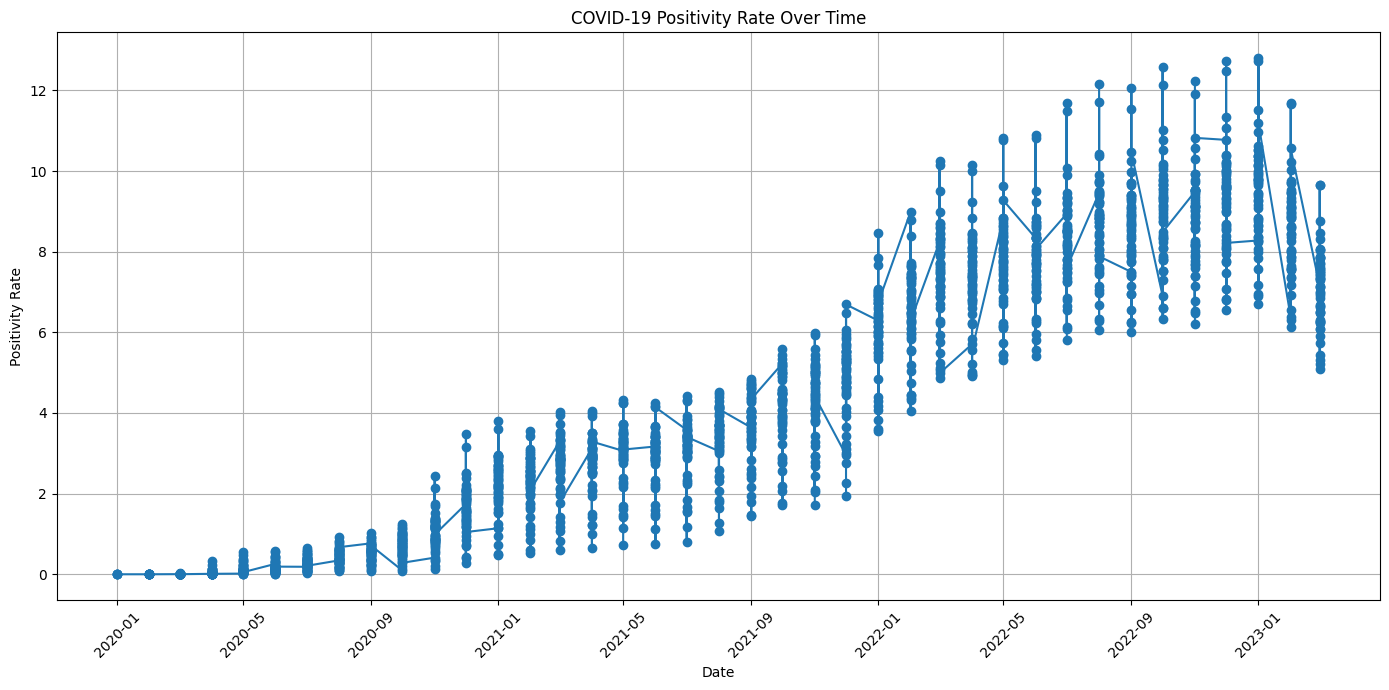

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'combined_monthly_covid_data.csv' has been created by the previous steps
# Load the combined data
combined_data = pd.read_csv('combined_monthly_covid_data.csv')

# Convert 'year_month' to datetime for plotting
combined_data['year_month'] = pd.to_datetime(combined_data['year_month'].astype(str))

# Sort the data by date
combined_data.sort_values('year_month', inplace=True)

# Plotting the positivity rate
plt.figure(figsize=(14, 7))
plt.plot(combined_data['year_month'], combined_data['positivity_rate'], marker='o')

plt.title('COVID-19 Positivity Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Positivity Rate')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()
